<a href="https://colab.research.google.com/github/Lucasa98/PDS-2024/blob/main/Guia4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1
Genere una señal s(t) y obtenga su versión discreta s[n] con periodo T=0.001 s en el intervalo de tiempo t=[0...1) s
- Calcule la TDF S[k] de s[n] y grafique el espectro de magnitud de S[k]

In [ ]:
import time
# Funcion para calcular TDF
def TDF_a_lo_bruto(x):
  exec_time = time.time()
  N = len(x)
  X = [0]*N
  for k in range(N):
    for n in range(N):
      X[k] += x[n]*np.exp(-1j*2*np.pi*k*n/N)
  print("TDF_a_lo_bruto: ", (time.time()-exec_time))
  return X

# Funcion un poco mejor
def TDF(x):
  exec_time = time.time()
  N = len(x)
  X = [0]*N
  C_A = 2*np.pi/N
  for k in range(N):
    C_B = C_A*k
    X[k] = np.sum(np.prod([x,np.exp(np.dot(-1j*C_B,range(N)))],axis=0),axis=0)
  print("TDF: ", (time.time()-exec_time))
  return X

# Antitransformada
def TDFI(x):
  exec_time = time.time()
  N = len(x)
  X = [0]*N
  C_A = 2*np.pi/N
  for k in range(N):
    C_B = C_A*k
    X[k] = np.sum(np.prod([x,np.exp(np.dot(1j*C_B,range(N)))],axis=0),axis=0)
  print("TDF: ", (time.time()-exec_time))
  return X

In [ ]:
# generaremos directamente su version discreta
f1 = 10
f2 = 20
T = 0.001
fm = 1/T
t = np.arange(0,1-T,T)
s = np.sin(2*np.pi*f1*t)+4*np.sin(2*np.pi*f2*t)

S_peor = TDF_a_lo_bruto(s) # TDF
S_np = np.fft.fft(s)
S = TDF(s) # TDF

# --------------- PLOT ---------------
plt.figure(figsize=(9, 15))

plt.subplot(4,1,1)
plt.plot(s)
plt.title("s[n]")

plt.subplot(4,1,2)
plt.plot(np.abs(S))
plt.title("S[k]")

plt.subplot(4,1,3)
plt.plot(np.abs(S_peor))
plt.title("S_peor[k]")

plt.subplot(4,1,4)
plt.plot(np.abs(S_np))
plt.title("S_np[k]")

plt.tight_layout()
plt.show()

- Verifique la relacion de Parseval para la TDF (conservacion de la energia)

In [ ]:
# Funcion de energia de una senial
def energia(x):
  N = len(x)
  sum = 0
  if(type(x[0]) == np.complex128):
    for n in range(N):
      sum += x[n] * np.conj(x[n])
    sum /= N
  else:
    for n in range(N):
      sum += np.power(x[n],2)
  return sum

In [ ]:
print("Energia de s[n]: ", energia(s))
print("Energia de S[k]: ", energia(S))

Energia de s[n]:  8499.681764728897
Energia de S[k]:  (8499.681764728884+0j)


Modifique y analice los resultados
- s[n] = sin(2pi * f1 * t) + 4sin(2pi * f2 * t) + 4

In [ ]:
f1 = 10
f2 = 20
T = 0.001
fm = 1/T
t = np.arange(0,1-T,T)
s = np.sin(2*np.pi*f1*t)+4*np.sin(2*np.pi*f2*t)+4

S_1 = TDF(s) # TDF

# --------------- PLOT ---------------
plt.figure(figsize=(15, 9))

plt.subplot(1,2,1)
plt.plot(np.abs(S))
plt.title("S[k]")

plt.subplot(1,2,2)
plt.plot(np.abs(S_1))
plt.title("S1[k]")

plt.tight_layout()
plt.show()

- f1=10; f2=11;

In [ ]:
f1 = 10
f2 = 11
T = 0.001
fm = 1/T
t = np.arange(0,1-T,T)
s = np.sin(2*np.pi*f1*t)+4*np.sin(2*np.pi*f2*t)

S_2 = TDF(s) # TDF

# --------------- PLOT ---------------
plt.figure(figsize=(15, 9))

plt.subplot(1,2,1)
plt.plot(np.abs(S))
plt.title("S[k]")

plt.subplot(1,2,2)
plt.plot(np.abs(S_2))
plt.title("S2[k]")

plt.tight_layout()
plt.show()

- f1=10; f2=10.5;

TDF:  0.41118574142456055


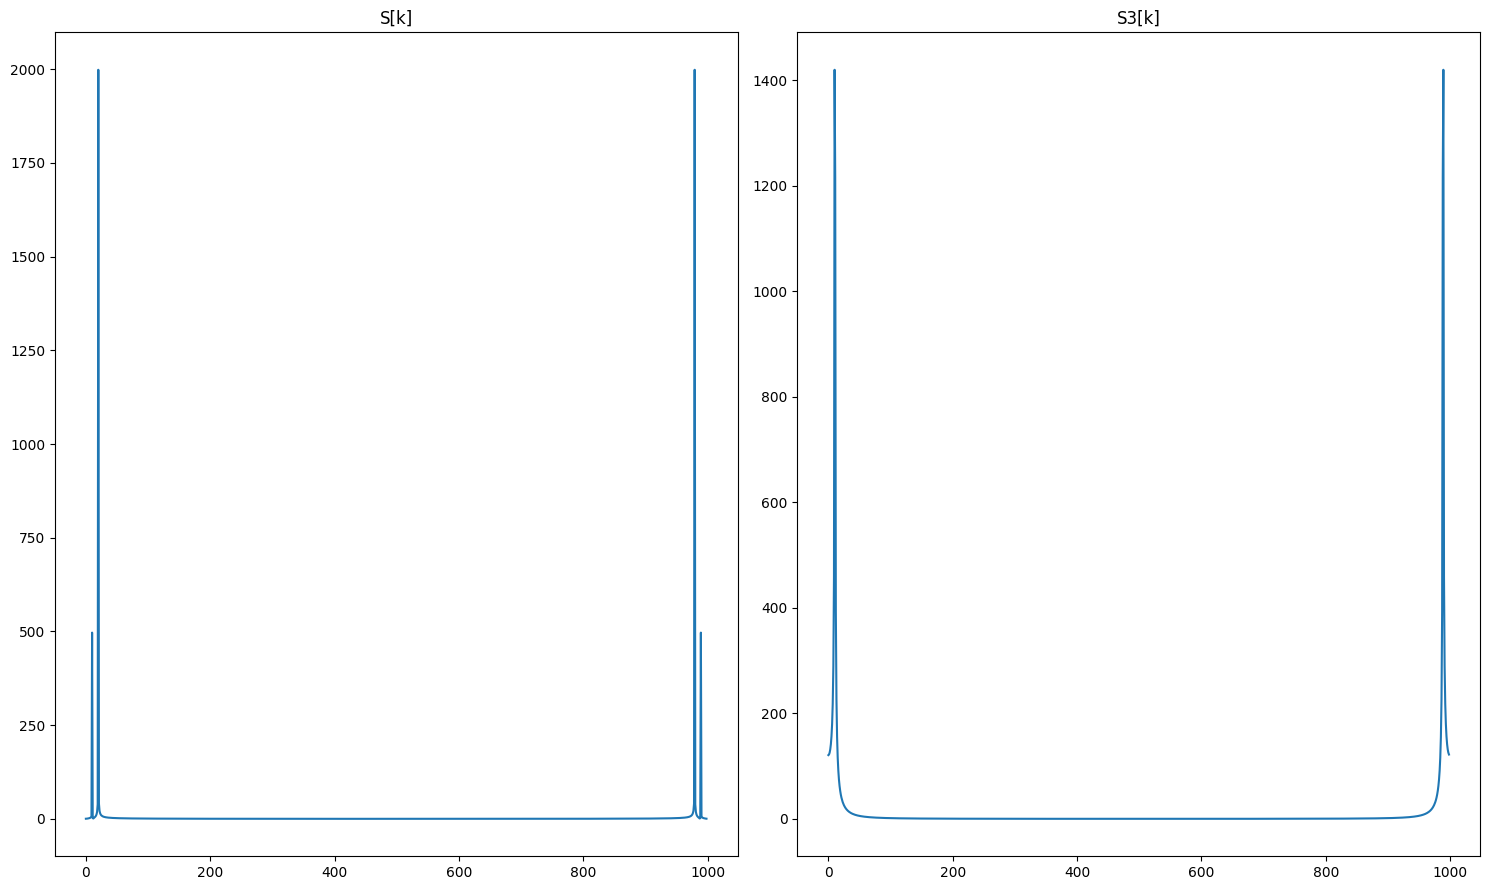

In [ ]:
f1 = 10
f2 = 10.5
T = 0.001
fm = 1/T
t = np.arange(0,1-T,T)
s = np.sin(2*np.pi*f1*t)+4*np.sin(2*np.pi*f2*t)

S_3 = TDF(s) # TDF

# --------------- PLOT ---------------
plt.figure(figsize=(15, 9))

plt.subplot(1,2,1)
plt.plot(np.abs(S))
plt.title("S[k]")

plt.subplot(1,2,2)
plt.plot(np.abs(S_3))
plt.title("S3[k]")

plt.tight_layout()
plt.show()

- t=[0...2) s

In [ ]:
f1 = 10
f2 = 20
T = 0.001
fm = 1/T
t = np.arange(0,2-T,T)
s = np.sin(2*np.pi*f1*t)+4*np.sin(2*np.pi*f2*t)

S_4 = TDF(s) # TDF

# --------------- PLOT ---------------
plt.figure(figsize=(15, 9))

plt.subplot(1,2,1)
plt.plot(np.abs(S))
plt.title("S[k]")

plt.subplot(1,2,2)
plt.plot(np.abs(S_4))
plt.title("S4[k]")

plt.tight_layout()
plt.show()

# Ejercicio 2
Genere:
- una senial senoidal discreta de frecuencia 2 Hz.
- Una senial cuadrada periodica de frecuencia 2 Hz.
- Una senial senoidal de frecuencia 4 Hz.

fase=0
fm=100 Hz
t=[0...1)

In [ ]:
fm = 100
T = 1/fm
t = np.arange(0,1,T)
f1_axis = np.arange(0,2,2/100)
f2_axis = np.arange(0,4,4/100)
N = len(t)

s1 = [0]*N
s2 = [0]*N
s3 = [0]*N

s1 = np.sin(2*np.pi*2*t)

for n in range(25):
  s2[n]=0
for n in range(25,50):
  s2[n]=1
for n in range(50,75):
  s2[n]=0
for n in range(75,100):
  s2[n]=1

s3 = np.sin(2*np.pi*4*t)

plt.subplot(3,1,1)
plt.plot(t,s1)
plt.subplot(3,1,1)
plt.plot(t,s2)
plt.subplot(3,1,1)
plt.plot(t,s3)

plt.show()

Verifique si son ortogonales las seniales
- s1 y s2
- s1 y s3
- s2 y s3

In [ ]:
print("producto interno <s1,s2> = ", np.vdot(s1,s2))
print("producto interno <s1,s3> = ", np.vdot(s1,s3))
print("producto interno <s2,s3> = ", np.vdot(s2,s3))

Calcule la TDF de las tres señales y verifique la ortogonalidad de los pares en el dominio transformado

In [ ]:
S1 = np.fft.fft(s1)
S2 = np.fft.fft(s2)
S3 = np.fft.fft(s3)

print("producto interno <S1,S2> = ", np.vdot(S1,S2))
print("producto interno <S1,S3> = ", np.vdot(S1,S3))
print("producto interno <S2,S3> = ", np.vdot(S2,S3))

# ----------------------- PLOT -----------------------
plt.subplot(3,1,1)
plt.plot(f1_axis,np.abs(S1))
plt.subplot(3,1,2)
plt.plot(f1_axis,np.abs(S2))
plt.subplot(3,1,3)
plt.plot(f2_axis,np.abs(S3))

plt.show()

Redefina la senial s3 como una senoidal de frecuencia 3.5 Hz. Verifique si es ortogonal respecto a sl en ambos dominios

In [ ]:
s3 = np.sin(2*np.pi*3.5*t)
S3 = np.fft.fft(s3)

print("producto interno <s1,s3> = ", np.vdot(s1,s3))
print("producto interno <S1,S3> = ", np.vdot(S1,S3))

# Ejercicio 3

Verifique la propiedad de retardo temporal de la TDF

- Genere una senoidal de 10 Hz con frecuencia muestral de 100 Hz en t=[0...1)s.

- Calcule que la TDF y modifique la TDF resultante de acuerdo a la ecuacion de la propiedad para generar un retardo de 10 muestras

- Antitransforme y verifique

In [ ]:
fm = 100
T = 1/fm
t = np.arange(0,1,T)
N = len(t)

x = np.sin(2*np.pi*10*t)
X = TDF(x)

# Retardo
Xr = [0]*N
for k in range(N):
  Xr[k] = X[k]*np.exp(-1j*2*np.pi*k*10/N)
xr = np.fft.ifft(Xr)

plt.figure(figsize=(9, 15))

plt.subplot(3,2,1)
plt.plot(x)
plt.title("x[n]")

plt.subplot(3,2,3)
plt.plot(np.abs(X))
plt.title("X[k]")

plt.subplot(3,2,2)
plt.plot(xr)
plt.title("x[n] retardada")

plt.subplot(3,2,4)
plt.plot(np.abs(Xr))
plt.title("X[k] retardada")

# Retardar x y Trasnformarla
x_ret = [0]*N
for n in range(10):
  x_ret[n] = x[N-10+n]
for n in range(N-10):
  x_ret[n+10] = x[n]

plt.subplot(3,2,5)
plt.plot(x_ret)

plt.subplot(3,2,6)
plt.plot(np.abs(TDF(x_ret)))

print(np.real(x[0]))
print(np.real(xr[10]))

plt.show()

# Ejercicio 4

Las señales comparten la propiedad de que cuanto más concentrada está su energía en el dominio temporal, más dispersa lo estará en el frecuencial, y viceversa.

Explore esta propiedad utilizando ventanas temporales, más o menos concentradas alrededor de cierto tiempo, y calculando sus respectivas TDF.


In [ ]:
fm = 100
T = 1/fm
t = np.arange(0,1,T)
N = len(t)

# Senoidal
s_sin = np.sin(2*np.pi*5*t)

# Delta de Dirac
s_dirac = [0]*N
s_dirac[0] = 1

# Transformadas
S_sin = TDF(s_sin)
S_dirac = TDF(s_dirac)

plt.subplot(2,2,1)
plt.plot(t,s_sin)
plt.title("s_sin[n]")

plt.subplot(2,2,3)
plt.plot(np.abs(S_sin))
plt.title("S_sin[k]")
# Se puede ver como se forman picos en +-5 (frecuencia de la senial)

plt.subplot(2,2,2)
plt.plot(t,s_dirac)
plt.title("s_dirac[n]")

plt.subplot(2,2,4)
plt.plot(np.abs(S_dirac))
plt.title("S_dirac[k]")

plt.tight_layout()
plt.show()

Ventanas y sus espectro de frecuencia
- Cuadrada
- Hamming
- Bartlett

In [ ]:
# ventana cuadrada
v_cuadrada = [0]*N
for n in range(round(N/2)): # el intervalo es arbitrario
  v_cuadrada[n] = 1

# ventana de Hamming
v_hamming = np.hamming(N)

# ventana de Bartlett
v_bartlett = np.bartlett(N)

# TDF
dft_cuadrada = np.fft.fft(v_cuadrada)
dft_hamming = np.fft.fft(v_hamming)
dft_bartlett = np.fft.fft(v_bartlett)

# ---------------- PLOT ----------------
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
plt.plot(t,v_cuadrada)
plt.title("cuadrada")

'''
plt.subplot(2,3,4)
plt.plot(np.abs(dft_cuadrada))
plt.title("TDF cuadrada")
#escala log
'''
ax=plt.subplot(2,3,4)
ax.plot(np.abs(dft_cuadrada))
ax.set_yscale('log')
plt.title("TDF cuadrada")

plt.subplot(2,3,2)
plt.plot(t,v_hamming)
plt.title("hamming")

'''
plt.subplot(2,3,5)
plt.plot(np.abs(dft_hamming))
plt.title("TDF hamming")
'''

ax=plt.subplot(2,3,5)
ax.plot(np.abs(dft_hamming))
ax.set_yscale('log')
plt.title("TDF hamming")

plt.subplot(2,3,3)
plt.plot(t,v_bartlett)
plt.title("bartlett")

'''
plt.subplot(2,3,6)
plt.plot(np.abs(dft_bartlett))
plt.title("TDF bartlett")
'''
ax=plt.subplot(2,3,6)
ax.plot(np.abs(dft_bartlett))
ax.set_yscale('log')
plt.title("TDF bartlett")

plt.tight_layout()
plt.show()


In [ ]:
sin_cuadrada = s_sin*v_cuadrada
sin_hamming = s_sin*v_hamming
sin_bartlett = s_sin*v_bartlett

dft_sin_cuadrada = np.fft.fft(sin_cuadrada)
dft_sin_hamming = np.fft.fft(sin_hamming)
dft_sin_bartlett = np.fft.fft(sin_bartlett)

# ---------------- PLOT ----------------
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
plt.plot(t,sin_cuadrada)
plt.title("sin + cuadrada")

plt.subplot(2,3,2)
plt.plot(t,sin_hamming)
plt.title("sin + hamming")

plt.subplot(2,3,3)
plt.plot(t,sin_bartlett)
plt.title("sin + bartlett")

plt.subplot(2,3,4)
plt.plot(np.abs(dft_sin_cuadrada))

plt.subplot(2,3,5)
plt.plot(np.abs(dft_sin_hamming))

plt.subplot(2,3,6)
plt.plot(np.abs(dft_sin_bartlett))

plt.tight_layout()
plt.show()

# Ejercicio 5
Ver figura 1
- Determinar frecuencia de la señal observada. Explicar la discrepancia con la frecuencia de la señal original (frecuencias aparentes)

TDF:  0.0052678585052490234


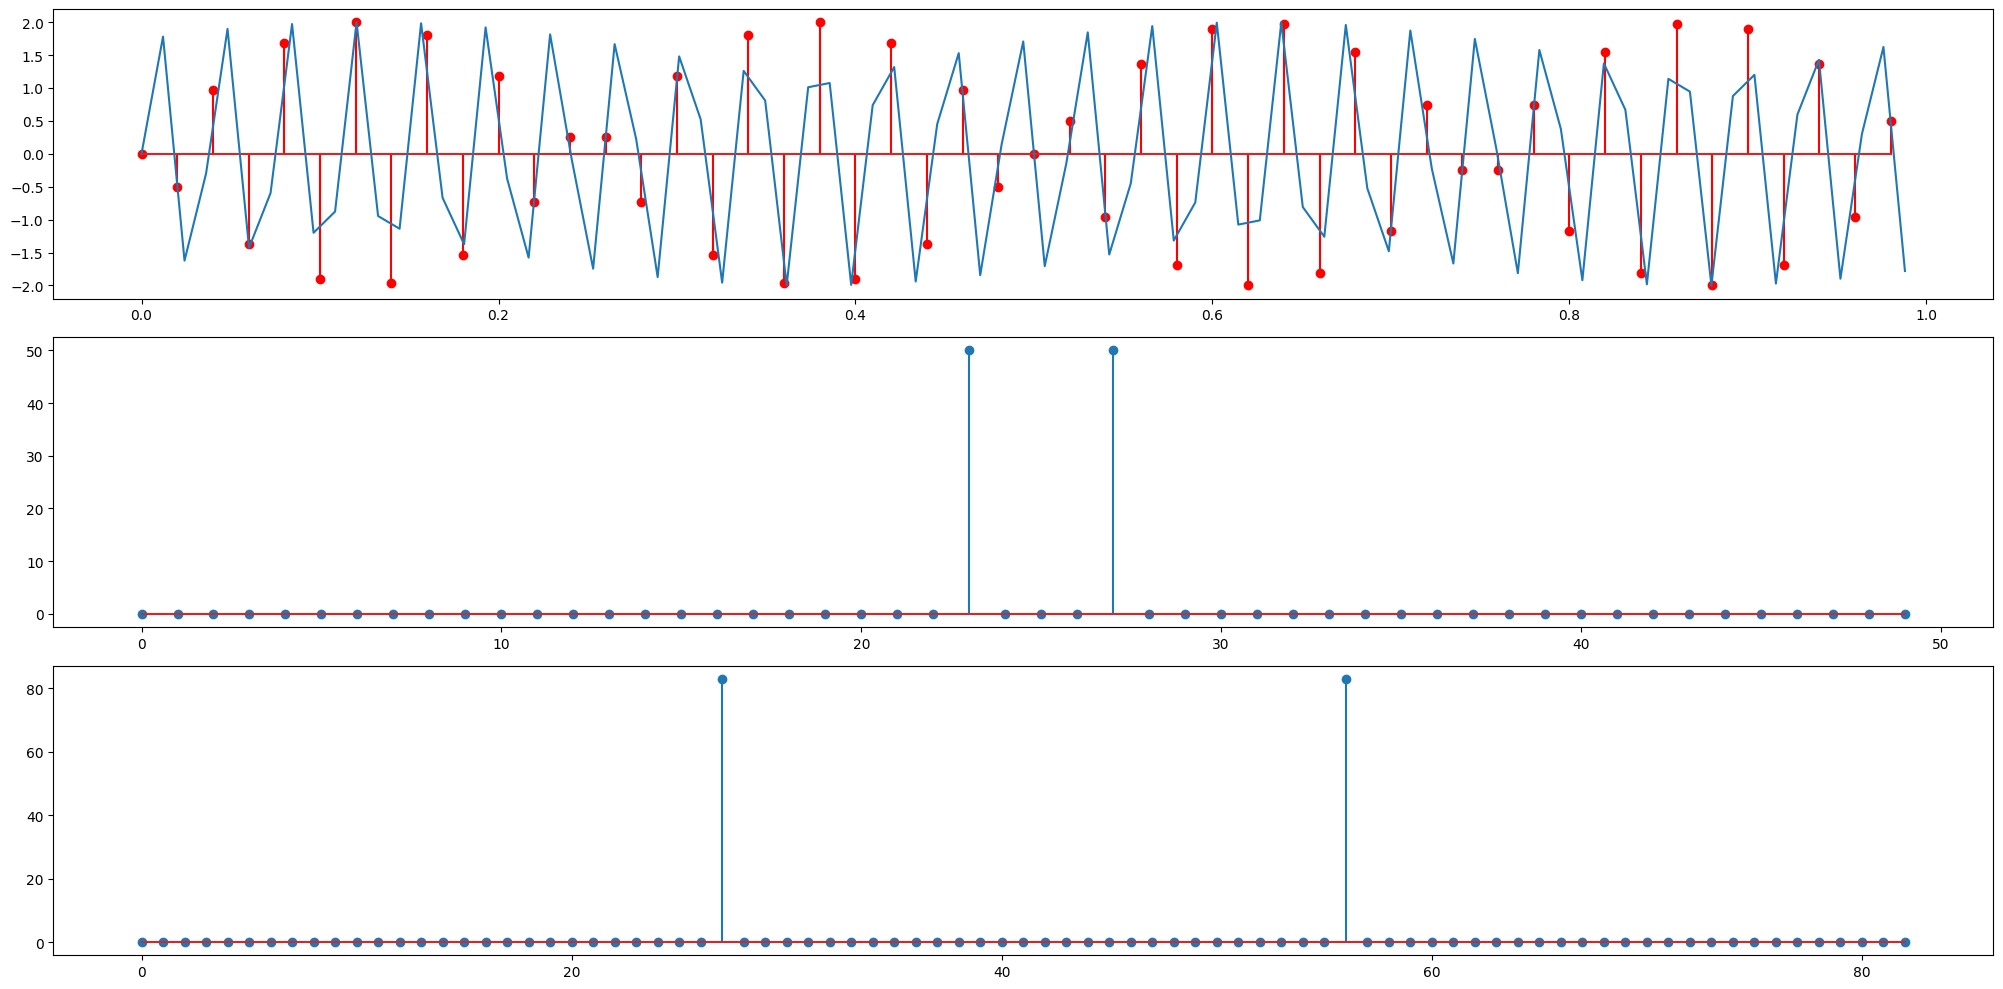

In [ ]:
t = np.arange(0,1,1/50)
t_bien = np.arange(0,1,1/83)

s = 2*np.sin(2*np.pi*27*t)
s_bien = 2*np.sin(2*np.pi*27*t_bien)


plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
plt.stem(t,s,'r')
plt.plot(t_bien,s_bien)

plt.subplot(3,1,2)
plt.stem(np.abs(np.fft.fft(s)))

plt.subplot(3,1,3)
plt.stem(np.abs(TDF(s_bien)))

plt.tight_layout()
plt.show()

- Deduzca una ecuacion para determinar la frecuencia de la senial con alias

In [ ]:
# f0 = abs( fs - fm*round(fs/fm) )
# f0 = abs( 27 - 50*round(~0.5) ) = 23
print(np.abs(105-50*np.round(105/50)))

# segun la formula la frecuencia aparente deberia ser f0=
s = 2*np.sin(2*np.pi*105*t)

plt.stem(np.abs(TDF(s)))
plt.show()

- Determine la relacion entre la magnitud observada en la transformada y la amplitud de la senial original

para
```
x[n] = A * sin(2*pi*f*n)
```
tenemos una TDF
```
X[k] = A/2 * (sin(0)*exp(0) + sin(2*pi*f)*exp(-j*pi*k)
X[k] =
```

# Ejercicio 6

In [ ]:
data = [
-2.35795379638672E+0002,
 1.96081756591797E+0002,
-3.38571960449219E+0002,
 1.55067062377930E+0002,
 1.66294982910156E+0002,
 1.53794128417969E+0002,
-1.48024612426758E+0002,
 2.58651397705078E+0002,
-3.05499755859375E+0002,
-9.69803237915039E+0000,
 2.06906524658203E+0002,
-1.00681335449218E+0002,
 1.88227890014648E+0002,
 2.28872146606445E+0002,
-7.56882476806641E+0001,
-1.84051498413086E+0002,
-6.39237747192383E+0001,
 1.48560317993164E+0002,
 1.24734947204589E+0002,
 4.01261367797852E+0001,
 2.38448623657227E+0002,
-1.63950698852539E+0002,
-4.66083755493164E+0001,
 1.29546676635742E+0002,
-3.93569107055664E+0001,
 8.43459396362305E+0001,
 6.01597900390625E+0001,
 9.61107177734375E+0001,
 1.92006683349609E+0000,
 2.93676986694336E+0001,
-7.01440048217773E+0000,
 6.98172683715820E+0001,
 2.03126144409180E+0002,
 2.28233261108398E+0001,
-1.48556167602539E+0002,
 8.49063262939453E+0001,
-3.13871612548828E+0001,
 2.79283447265625E+0002,
 1.89256256103516E+0002,
-1.12115173339843E+0002,
 9.85240936279297E-0001,
-1.34878112792969E+0002
]

def fftfreq(n, d=1.0):
    # Formula de frecuencias
    # F_k = k/N*d
    #
    # k = dt*f
    #
    # Donde:
    #   n (int): Número total de puntos en la señal.
    #   d (float, opcional): Espaciado de las muestras en el dominio del tiempo. Por defecto es 1.0.
    #   F_k : Es la frecuencia asociada con el coeficiente de la FFT en el índice k.


    # Calcular el espaciado de las muestras en el dominio del tiempo
    spacing = 1.0 / (n * d)

    # Generar las frecuencias asociadas
    F_k = np.empty(n)
    for k in range(n):
        frequency = k * spacing
        F_k[k] = frequency

    # La funcion resultande es F_k[k] que devuelve la frecuencia para un indice dado
    # Por ejemplo suponga quiere encontrar la frecuencia asociada al indice 3 del arreglo resultante
    # de una DFT, teniendo esta funcion usted haría F_k[3] = 180. En este ejemplo, el indice 3 de
    # la DFT contiene la frecuencia 180 Hz (Hertz)
    return F_k

def eliminar_frecuencias(signalX, freq_min, freq_max, fs):
    N = len(signalX)
    freqs = fftfreq(N, 1/fs)
    indices = np.where((freqs >= freq_min) & (freqs <= freq_max))
    signalX_filtered = np.copy(signalX)
    signalX_filtered[indices] = 0
    return signalX_filtered



In [ ]:
X = np.fft.fft(data)

X_filtered = eliminar_frecuencias(X,40,180,360)
x_filtered = np.fft.ifft(X_filtered)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(np.real(X))
plt.title('Tranformada (frecuencias ruidosas no eliminadas)')

plt.subplot(2, 1, 2)
plt.stem(np.real(X_filtered))
plt.title('Transformada (frecuencias eliminadas de 40 a 180 Hz)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(data), label='Señal original')
plt.title('Señal original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(np.real(x_filtered), label='Señal filtrada', color='orange')
plt.title('Señal filtrada (frecuencias eliminadas de 40 a 180 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


